In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

In [2]:
df= pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.isnull().value_counts()

Region   Date   Frequency   Estimated Unemployment Rate (%)   Estimated Employed   Estimated Labour Participation Rate (%)  Area 
False   False  False       False                             False                False                                     False    740
True    True   True        True                              True                 True                                      True      28
Name: count, dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
df.columns = ['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Labour_Participation_Rate',
       'Area']

In [12]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Labour_Participation_Rate', 'Area'],
      dtype='object')

In [13]:
df.dtypes

Region                          object
Date                            object
Frequency                       object
Estimated_Unemployment_Rate    float64
Estimated_Employed             float64
Labour_Participation_Rate      float64
Area                            object
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%m-%Y')

In [15]:
df.dtypes

Region                                 object
Date                           datetime64[ns]
Frequency                              object
Estimated_Unemployment_Rate           float64
Estimated_Employed                    float64
Labour_Participation_Rate             float64
Area                                   object
dtype: object

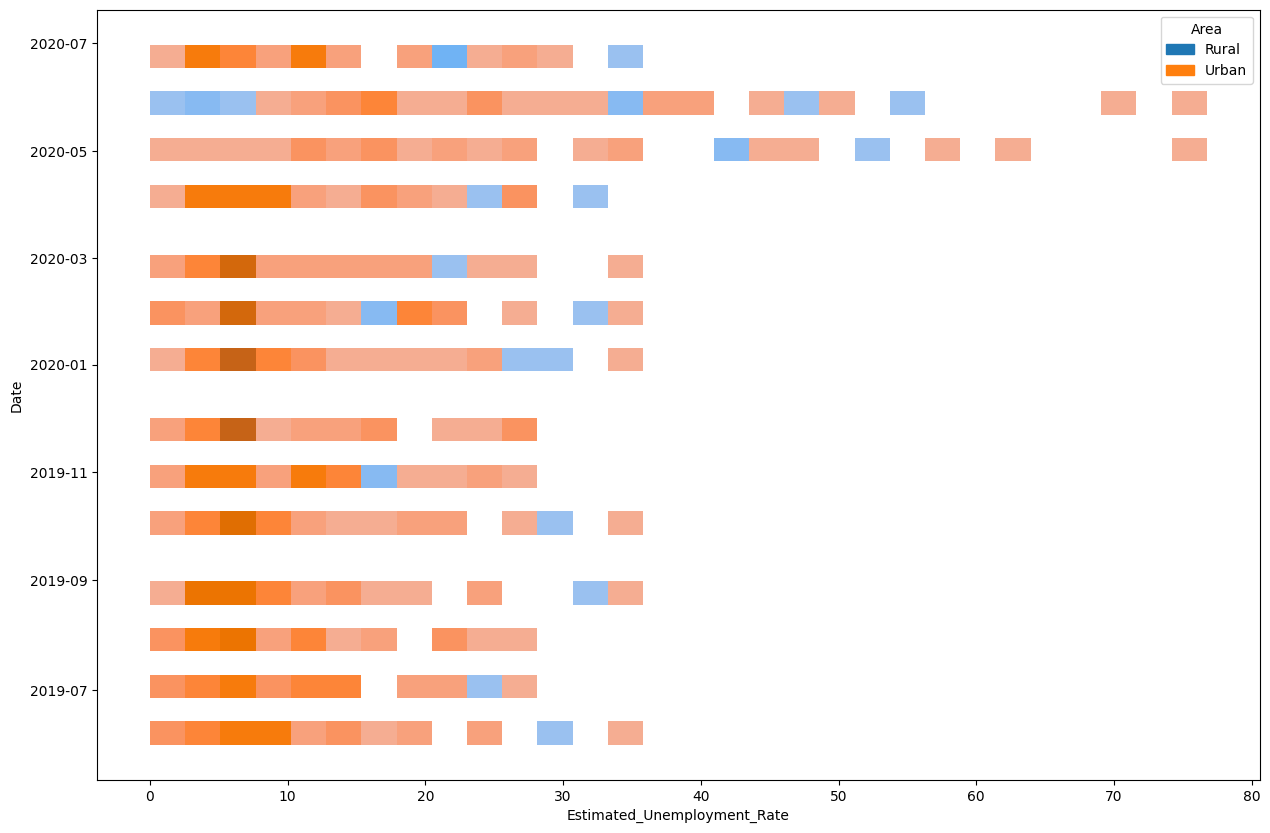

In [16]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, y='Date', x='Estimated_Unemployment_Rate', kde=True, bins=30, hue='Area')
plt.show()

(array([ 0., 20., 40., 60., 80.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80')])

<Figure size 2000x2000 with 0 Axes>

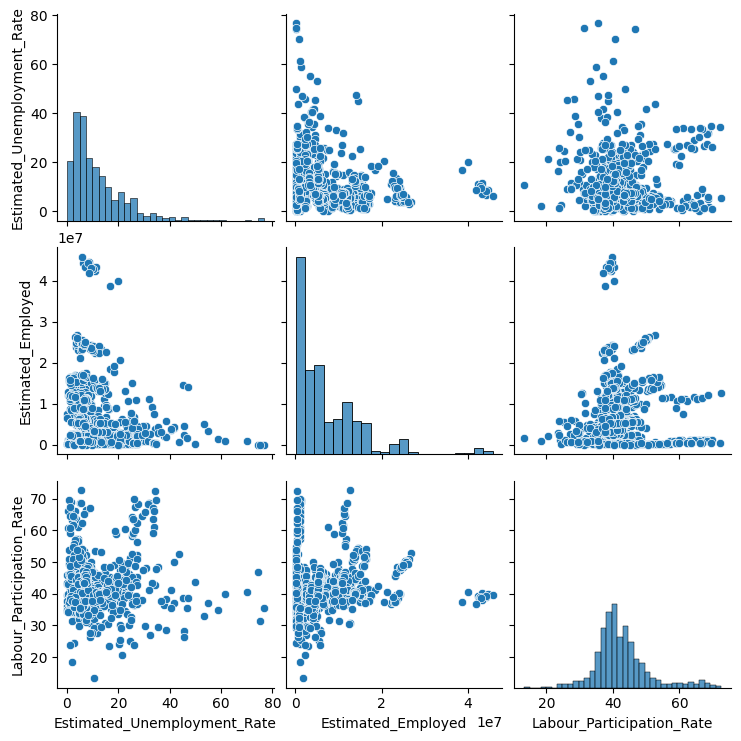

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.xticks(rotation = 45)

In [21]:
label = LabelEncoder()

In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])

In [27]:
df.sample(5)

,Region,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area
439,4,2020-05-31,1,24.10,1276291.0,30.24,1
542,12,2020-02-29,1,2.88,8924061.0,39.45,1
95,8,2019-06-30,0,23.08,4745178.0,45.23,0
78,6,2020-04-30,0,15.91,181657.0,45.36,0
415,3,2019-05-31,1,18.35,348042.0,44.89,1


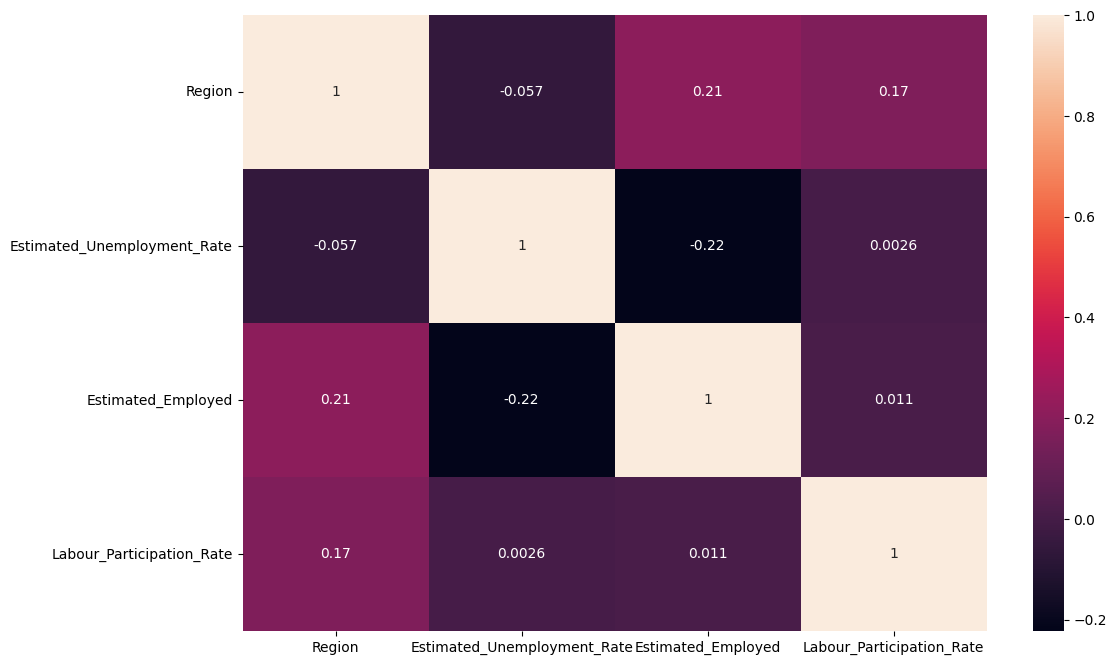

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.drop(columns=['Date']).corr(), annot=True)
plt.show()

In [35]:
df.drop(columns=['Frequency', 'Area'], inplace=True)

In [41]:
df['Date'].dt.year[0]

2019

In [42]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [44]:
df.drop(columns=['Date'], inplace=True)

In [45]:
X = df.drop(columns=['Estimated_Unemployment_Rate'])
y = df['Estimated_Unemployment_Rate']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [55]:
print(mean_absolute_error(y_test, y_pred))
mean_squared_error(y_test, y_pred)

7.271744295014021


135.15877713053922

In [56]:
y_pred_test = model.predict(X_train)

In [59]:
print('MAE training ',mean_absolute_error(y_test, y_pred))
print('MSE training ', mean_squared_error(y_test, y_pred))

print('MAE training ',mean_absolute_error(y_train, y_pred_test))
print('MSE training ',mean_squared_error(y_train, y_pred_test))

MAE training  7.271744295014021
MSE training  135.15877713053922
MAE training  7.09980011397636
MSE training  90.64473684985019
